In [6]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

In [7]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import os
import IPython.display

In [8]:
TRAIN_DATA_DIR = 'C:/Users/dahyun/speech/data/train2/final/'
TEST_DATA_DIR = 'C:/Users/dahyun/speech/data/test2/final/'

In [9]:
TRAIN_NEGATIVE_DATA_DIR = 'C:/Users/dahyun/speech/data/train2/negative/'
TEST_NEGATIVE_DATA_DIR = 'C:/Users/dahyun/speech/data/test2/negative/'

In [10]:
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))
#STFT한 것, CNN분석하기 위해 Spectogram으로 만든 것, MF한 것, mel-spectogram한 것

In [11]:
wav, sr = librosa.load('C:/Users/dahyun/speech/data/train2/final/2_0.wav_fire_0.wav', sr=16000)

In [14]:
for fname in os.listdir(TRAIN_DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        #print(TRAIN_DATA_DIR + fname)
        wav, sr = librosa.load(TRAIN_DATA_DIR + fname)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        train_mfccs.append(padded_mfcc)
        train_y.append('0')
    except Exception as e:
        #print(fname, e)
        raise

In [15]:
for fname in os.listdir(TRAIN_NEGATIVE_DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        
        wav, sr = librosa.load(TRAIN_NEGATIVE_DATA_DIR + fname)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        train_mfccs.append(padded_mfcc)
        train_y.append('1')
    except Exception as e:
        #print(fname, e)
        raise

In [16]:
for fname in os.listdir(TEST_DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        
        wav, sr = librosa.load(TEST_DATA_DIR + fname)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        test_mfccs.append(padded_mfcc)
        test_y.append('0')
    except Exception as e:
        #print(fname, e)
        raise

In [17]:
for fname in os.listdir(TEST_NEGATIVE_DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        
        wav, sr = librosa.load(TEST_NEGATIVE_DATA_DIR + fname)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        test_mfccs.append(padded_mfcc)
        test_y.append('1')
    except Exception as e:
        #print(fname, e)
        raise

In [18]:
wav.shape

(20000,)

In [19]:

train_mfccs = np.array(train_mfccs)
train_y = np.array(train_y)
train_y = to_categorical(np.array(train_y))

test_mfccs = np.array(test_mfccs)
test_y = np.array(test_y)
test_y = to_categorical(np.array(test_y))

print('train_mfccs', train_mfccs.shape)
print('train_y', train_y.shape)

print('test_mfccs', test_mfccs.shape)
print('test_y', test_y.shape)

train_mfccs (4615, 20, 40)
train_y (4615, 2)
test_mfccs (200, 20, 40)
test_y (200, 2)


In [20]:
train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (4615, 20, 40, 1)
test X shape: (200, 20, 40, 1)


In [21]:
np.save(os.path.join("data/dataset", "train_X.npy"), train_X_ex)
np.save(os.path.join("data/dataset", "train_y.npy"), np.array(train_y))
np.save(os.path.join("data/dataset", "test_X.npy"), test_X_ex)
np.save(os.path.join("data/dataset", "test_y.npy"), np.array(test_y))

In [22]:
train_X_ex = np.load(os.path.join('data/dataset', 'train_X.npy'))
train_y = np.load(os.path.join('data/dataset', 'train_y.npy'))
test_X_ex = np.load(os.path.join('data/dataset', 'test_X.npy'))
test_y = np.load(os.path.join('data/dataset', 'test_y.npy'))

In [23]:
from sklearn.utils import shuffle
train_X_ex, train_y = shuffle(train_X_ex, train_y, random_state=1523)
test_X_ex, test_y = shuffle(test_X_ex, test_y, random_state=1523)

In [24]:
train_y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [25]:
test_y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [26]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(64, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)


m=Flatten()(m)
m=Dense(32, activation='relu')(m)
op=Dense(2, activation='softmax')(m)

model = Model(ip, op)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 40, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 37, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                73760     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 74,914
Trainable params: 74,914
Non-trainable params: 0
__________________________________________________

In [27]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
                    train_y,
                    epochs=15,
                    batch_size=32,
                    verbose=1,
                    validation_data=(test_X_ex, test_y))

Epoch 1/15
145/145 [==============================] - 1s 6ms/step - loss: 0.7015 - accuracy: 0.8030 - val_loss: 0.9216 - val_accuracy: 0.8100
Epoch 2/15
145/145 [==============================] - 1s 6ms/step - loss: 0.4904 - accuracy: 0.8555 - val_loss: 0.8388 - val_accuracy: 0.8350
Epoch 3/15
145/145 [==============================] - 1s 6ms/step - loss: 0.4063 - accuracy: 0.8828 - val_loss: 0.7676 - val_accuracy: 0.8700
Epoch 4/15
145/145 [==============================] - 1s 6ms/step - loss: 0.3436 - accuracy: 0.8992 - val_loss: 0.7122 - val_accuracy: 0.8950
Epoch 5/15
145/145 [==============================] - 1s 6ms/step - loss: 0.2959 - accuracy: 0.9142 - val_loss: 0.6510 - val_accuracy: 0.9050
Epoch 6/15
145/145 [==============================] - 1s 6ms/step - loss: 0.2585 - accuracy: 0.9239 - val_loss: 0.6398 - val_accuracy: 0.9100
Epoch 7/15
145/145 [==============================] - 1s 6ms/step - loss: 0.2290 - accuracy: 0.9324 - val_loss: 0.5950 - val_accuracy: 0.9100
Epoch 

In [29]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

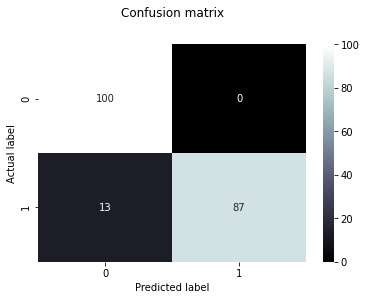

In [30]:
Y_pred = model.predict(test_X_ex)
y_pred = np.argmax(Y_pred,axis=1)

matrix = confusion_matrix(np.argmax(test_y,axis=1), y_pred)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
Y_pred

array([[9.99999762e-01, 1.93373140e-07],
       [1.22036345e-05, 9.99987841e-01],
       [6.26480952e-03, 9.93735254e-01],
       [9.99993205e-01, 6.74153534e-06],
       [6.67359927e-05, 9.99933243e-01],
       [6.37970807e-04, 9.99362051e-01],
       [3.52969823e-06, 9.99996424e-01],
       [9.99999762e-01, 2.27059004e-07],
       [5.44318138e-03, 9.94556785e-01],
       [9.99998093e-01, 1.88393483e-06],
       [1.00212685e-06, 9.99999046e-01],
       [1.75849870e-02, 9.82415020e-01],
       [1.29474048e-02, 9.87052619e-01],
       [1.33933267e-02, 9.86606598e-01],
       [9.99199808e-01, 8.00242648e-04],
       [2.82441196e-03, 9.97175574e-01],
       [9.99951363e-01, 4.86446734e-05],
       [9.99014139e-01, 9.85896564e-04],
       [9.99997377e-01, 2.67039240e-06],
       [9.81403947e-01, 1.85960326e-02],
       [9.99725997e-01, 2.74015969e-04],
       [9.99932766e-01, 6.72501483e-05],
       [9.99570906e-01, 4.29095147e-04],
       [9.99990463e-01, 9.54105963e-06],
       [9.999984

In [32]:
Y_pred = model.predict(train_X_ex)
y_pred=np.argmax(Y_pred,axis=1)

In [33]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)